In [38]:
# Load modules

import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import warnings

In [39]:
# Define a function for data processing

def process_data(data, timestamp_str, label):
    # Convert timestamps to Unix timestamps
    unix_timestamp = []

    for i in range(len(timestamp_str)):
        timestamp = datetime.strptime(timestamp_str[i], "%Y-%m-%dT%H:%M:%S.%f")
        
        # Calculate the difference in seconds from a reference point
        timestamp_difference = timestamp - datetime(1970, 1, 1)
        
        # Store the difference as a floating-point number
        unix_timestamp.append(timestamp_difference.total_seconds())

    # Extract data components
    Bx = data[:, 0]
    By = data[:, 1]
    Bz = data[:, 2]
    B_mag = data[:, 3]
    x = data[:, 4]
    y = data[:, 5]
    z = data[:, 6]

    return Bx, By, Bz, B_mag, x, y, z, unix_timestamp, label


# Define a fucntion to plot B-field components

def plot_magnetic_field(unix_timestamp, Bx, By, Bz, B_mag, flyby):
    fig, axes = plt.subplots(4, 1, figsize=(7, 6), sharex=True)

    # Plot Bx in the first subplot
    axes[0].plot(unix_timestamp, Bx, label="$B_x$")
    axes[0].set_ylabel('$B_x$ [nT]')
    axes[0].set_title(f"Callisto Flyby: {flyby}")

    # Plot By in the second subplot
    axes[1].plot(unix_timestamp, By, label="$B_y$")
    axes[1].set_ylabel('$B_y$ [nT]')

    # Plot Bz in the third subplot
    axes[2].plot(unix_timestamp, Bz, label="$B_z$")
    axes[2].set_ylabel('$B_z$ [nT]')

    # Magnitude of B
    axes[3].plot(unix_timestamp, B_mag, label="|B|")
    axes[3].set_xlabel('Unix Timestamp [s]')
    axes[3].set_ylabel('|B| [nT]')

    plt.tight_layout()
    plt.show()


# Define a function to add a circle to a plot

def add_callisto_circle(ax):
    callisto = plt.Circle((0, 0), 1, color='black')
    ax.add_patch(callisto)
    return ax


# Define a function to convert from Cartesian to Spherical coords
# Changed equation for theta
# theta = angle from x-axis in x-y plane [-pi, pi]
# phi = angle from z axis 

def cartesian_to_spherical(x, y, z):   
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.sign(x) * np.arccos(y / (np.sqrt(x**2 + y**2)))
    # theta = np.nan_to_num(x=theta)    - can use this for nan error if necessary
    phi = np.arccos(z/r)
    return r, theta, phi


# Define a function to convert from Spherical to Cartesian coords

def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(phi) * np.sin(theta)
    y = r * np.sin(phi) * np.cos(theta)
    z = r * np.cos(phi)
    return x, y, z


# Defining a function to find index of min. altitude above Callisto
# uses index to find the closest approach coordinates
def CA_coords(r, theta, phi):
    min_index = np.argmin(r)
    return (r[min_index], theta[min_index], phi[min_index])

def ClosestApp(r, theta, phi, unix_timestamp):
    R_Cal = 2410.3 # Calisto radius in km
    min_index = np.argmin(r)
    return unix_timestamp[min_index], r[min_index], (r[min_index]-1)*R_Cal, theta[min_index], phi[min_index], spherical_to_cartesian(r[min_index], theta[min_index], phi[min_index])

In [40]:
# WIP - creating a plot style


# Define the hex color codes
colors = ['#f94144', '#f3722c', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b', '#577590']

# Create a custom color map using the defined colors
custom_cmap = mpl.colors.ListedColormap(colors)

# Create a custom style based on the ggplot style
space = {
    'axes.facecolor': 'lightgray', # Background color
    'axes.edgecolor': 'white',     # Color of axes edges
    'axes.labelcolor': 'black',    # Color of labels
    'xtick.color': 'black',        # Color of x-axis ticks
    'ytick.color': 'black',        # Color of y-axis ticks
    'grid.color': 'white',         # Color of gridlines
    'lines.linewidth': 2,          # Line width
    'lines.markersize': 8,         # Marker size
    'patch.edgecolor': 'white',    # Color of patch edges
    'text.color': 'black',         # Color of text
    'font.size': 12,               # Font size
    'axes.prop_cycle': plt.cycler(color=colors),  
}

# Set the custom style
plt.style.use('ggplot')
mpl.style.use(space)



In [41]:
# Load the datasets

data_03 = np.loadtxt("./galileo-mag-jup-calibrated/ORB03_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_03 = np.loadtxt("./galileo-mag-jup-calibrated/ORB03_CALL_CPHIO.TAB", usecols=0, dtype=str)

data_09 = np.loadtxt("./galileo-mag-jup-calibrated/ORB09_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_09 = np.loadtxt("./galileo-mag-jup-calibrated/ORB09_CALL_CPHIO.TAB", usecols=0, dtype=str)

data_10 = np.loadtxt("./galileo-mag-jup-calibrated/ORB10_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_10 = np.loadtxt("./galileo-mag-jup-calibrated/ORB10_CALL_CPHIO.TAB", usecols=0, dtype=str)

data_21 = np.loadtxt("./galileo-mag-jup-calibrated/ORB21_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_21 = np.loadtxt("./galileo-mag-jup-calibrated/ORB21_CALL_CPHIO.TAB", usecols=0, dtype=str)

data_22 = np.loadtxt("./galileo-mag-jup-calibrated/ORB22_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_22 = np.loadtxt("./galileo-mag-jup-calibrated/ORB22_CALL_CPHIO.TAB", usecols=0, dtype=str)

data_23 = np.loadtxt("./galileo-mag-jup-calibrated/ORB23_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_23 = np.loadtxt("./galileo-mag-jup-calibrated/ORB23_CALL_CPHIO.TAB", usecols=0, dtype=str)

data_30 = np.loadtxt("./galileo-mag-jup-calibrated/ORB30_CALL_CPHIO.TAB", usecols=(1, 2, 3, 4, 5, 6, 7))
timestamp_str_30 = np.loadtxt("./galileo-mag-jup-calibrated/ORB30_CALL_CPHIO.TAB", usecols=0, dtype=str)

In [42]:
# Process the data for each dataset

Bx_03, By_03, Bz_03, B_mag_03, x_03, y_03, z_03, unix_timestamp_03, label_03 = process_data(data_03, timestamp_str_03, 'ORB03')
Bx_09, By_09, Bz_09, B_mag_09, x_09, y_09, z_09, unix_timestamp_09, label_09 = process_data(data_09, timestamp_str_09, 'ORB09')
Bx_10, By_10, Bz_10, B_mag_10, x_10, y_10, z_10, unix_timestamp_10, label_10 = process_data(data_10, timestamp_str_10, 'ORB10')
Bx_21, By_21, Bz_21, B_mag_21, x_21, y_21, z_21, unix_timestamp_21, label_21 = process_data(data_21, timestamp_str_21, 'ORB21')
Bx_22, By_22, Bz_22, B_mag_22, x_22, y_22, z_22, unix_timestamp_22, label_22 = process_data(data_22, timestamp_str_22, 'ORB22')
Bx_23, By_23, Bz_23, B_mag_23, x_23, y_23, z_23, unix_timestamp_23, label_23 = process_data(data_23, timestamp_str_23, 'ORB23')
Bx_30, By_30, Bz_30, B_mag_30, x_30, y_30, z_30, unix_timestamp_30, label_30 = process_data(data_30, timestamp_str_30, 'ORB30')

orbit_label = [label_03, label_09, label_10, label_21, label_22, label_23, label_30]
unix_timestamp_all = [unix_timestamp_03, unix_timestamp_09, unix_timestamp_10, unix_timestamp_21, unix_timestamp_22, unix_timestamp_23, unix_timestamp_30]

In [43]:
# Convert to spherical coords

r_03, theta_03, phi_03 = cartesian_to_spherical(x_03, y_03, z_03)
r_09, theta_09, phi_09 = cartesian_to_spherical(x_09, y_09, z_09)
r_10, theta_10, phi_10 = cartesian_to_spherical(x_10, y_10, z_10)
r_21, theta_21, phi_21 = cartesian_to_spherical(x_21, y_21, z_21)
r_22, theta_22, phi_22 = cartesian_to_spherical(x_22, y_22, z_22)
r_23, theta_23, phi_23 = cartesian_to_spherical(x_23, y_23, z_23)
r_30, theta_30, phi_30 = cartesian_to_spherical(x_30, y_30, z_30)

r_all = [r_03, r_09, r_10, r_21, r_22, r_23, r_30]
theta_all = [theta_03, theta_09, theta_10, theta_21, theta_22, theta_23, theta_30]
phi_all = [phi_03, phi_09, phi_10, phi_21, phi_22, phi_23, phi_30]

In [53]:
# Calculating closest approach coordinates
# I'm sure this can be done more efficicently but takes rewriting other code
CA_coords_03 = CA_coords(r_03, theta_03, phi_03)
CA_coords_09 = CA_coords(r_09, theta_09, phi_09)
CA_coords_10 = CA_coords(r_10, theta_10, phi_10)
CA_coords_21 = CA_coords(r_21, theta_21, phi_21)
CA_coords_22 = CA_coords(r_22, theta_22, phi_22)
CA_coords_23 = CA_coords(r_23, theta_23, phi_23)
CA_coords_30 = CA_coords(r_30, theta_30, phi_30)

CA_coords_all = [CA_coords_03, CA_coords_09, CA_coords_10, CA_coords_21, CA_coords_22, CA_coords_23, CA_coords_30]


# Want to print array with CA info (timestamp, r-1 (in km), r, theta, phi, x, y, z)
R_Cal = 2410.3 # Calisto radius in km

print("Orbit, unix timestamp, distance from centre of callisto (in R_C), altitude above surface (in km), theta, phi, x, y, z")
for i in range(0, len(r_all)):
    print("CA of",  orbit_label[i], ":", ClosestApp(r_all[i], theta_all[i], phi_all[i], unix_timestamp_all[i]))

Orbit, unix timestamp, distance from centre of callisto (in R_C), altitude above surface (in km), theta, phi, x, y, z
CA of ORB03 : (847114468.0, 1.4690401797772583, 1130.5275453171257, 1.3814367477404446, 1.3408649400882449, (1.4048099999999997, 0.26924000000000003, 0.33480999999999983))
CA of ORB09 : (867246470.279, 1.1710592166923073, 412.30402999346825, -1.739306522596824, 1.535427803847182, (-1.15375, -0.19628000000000012, 0.041410000000000044))
CA of ORB10 : (874455535.312, 1.2197238619458093, 529.6004244479842, 1.3946429311245006, 1.4916548592525851, (1.19709, 0.21308000000000007, 0.09643))
CA of ORB21 : (930728795.131, 1.4340502083260542, 1046.1912171282886, 1.3528838104287244, 1.5847432920345998, (1.4, 0.30999999999999983, -0.019999999999999896))
CA of ORB22 : (934619460.874, 1.9496153466773902, 2288.857870096514, 1.889300139353162, 1.6118415860027075, (1.8500000000000003, -0.61, -0.07999999999999997))
CA of ORB23 : (937502813.202, 1.4389232085139223, 1057.936609481107, 1.9035

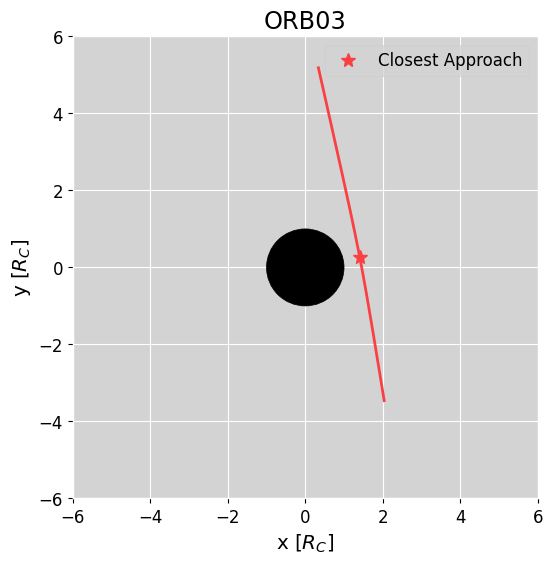

In [45]:
# Plot Galileo Trajectory

# Define the common x and y limits for all subplots
common_xlim = (-6, 6)  
common_ylim = (-6, 6)  

fig, ax = plt.subplots(figsize=(6, 6))
ax = add_callisto_circle(ax)

# Apply the common limits
ax.set_xlim(common_xlim)
ax.set_ylim(common_ylim)

# Plot the data
orbit = ax.plot(x_03, y_03)

x, y, z = spherical_to_cartesian(CA_coords_03[0], CA_coords_03[1], CA_coords_03[2])
ax.plot(x, y, marker='*', markersize=10, linestyle='none', color=orbit[0].get_color(), label="Closest Approach")

# Set the labels
ax.set_xlabel('x [$R_C$]')
ax.set_ylabel('y [$R_C$]')

plt.title(label_03)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


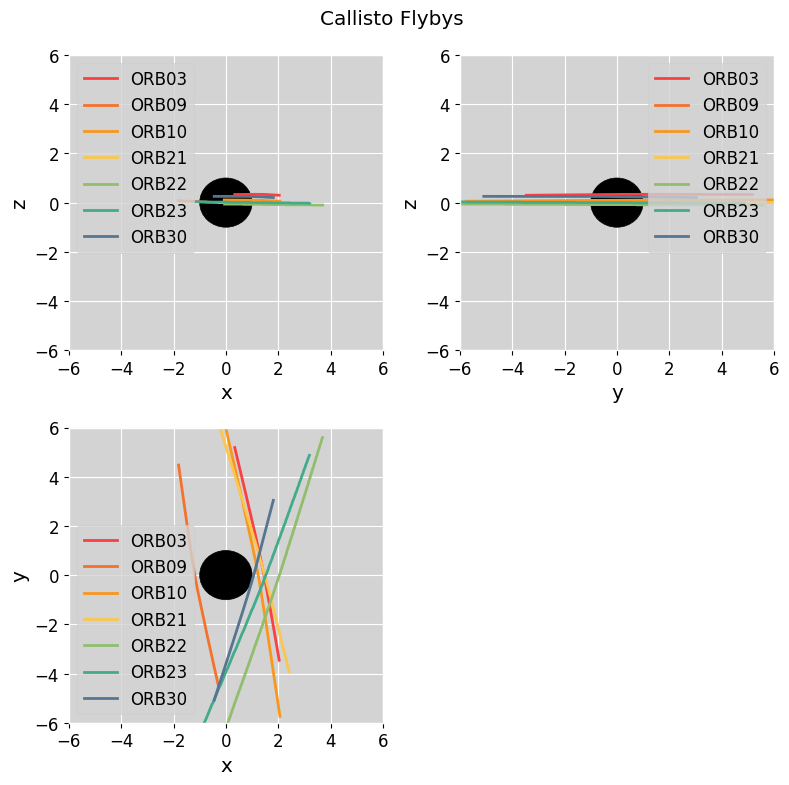

In [46]:
# ... in all orientations

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Add the Callisto circle to each subplot using the function
for i in range(2):
    for j in range(2):
        axes[i, j] = add_callisto_circle(axes[i, j])

# Apply the common limits to all subplots
common_xlim = (-6, 6)  
common_ylim = (-6, 6)  

for i in range(2):
    for j in range(2):
        axes[i, j].set_xlim(common_xlim)
        axes[i, j].set_ylim(common_ylim)

# First subplot: x against z
axes[0, 0].plot(x_03, z_03, label=label_03)
axes[0, 0].plot(x_09, z_09, label=label_09)
axes[0, 0].plot(x_10, z_10, label=label_10)
axes[0, 0].plot(x_21, z_21, label=label_21)
axes[0, 0].plot(x_22, z_22, label=label_22)
axes[0, 0].plot(x_23, z_23, label=label_23)
axes[0, 0].plot(x_30, z_30, label=label_30)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('z')

# Second subplot: y against z
axes[0, 1].plot(y_03, z_03, label=label_03)
axes[0, 1].plot(y_09, z_09, label=label_09)
axes[0, 1].plot(y_10, z_10, label=label_10)
axes[0, 1].plot(y_21, z_21, label=label_21)
axes[0, 1].plot(y_22, z_22, label=label_22)
axes[0, 1].plot(y_23, z_23, label=label_23)
axes[0, 1].plot(y_30, z_30, label=label_30)
axes[0, 1].set_xlabel('y')
axes[0, 1].set_ylabel('z')

# Third subplot: x against y
axes[1, 0].plot(x_03, y_03, label=label_03)
axes[1, 0].plot(x_09, y_09, label=label_09)
axes[1, 0].plot(x_10, y_10, label=label_10)
axes[1, 0].plot(x_21, y_21, label=label_21)
axes[1, 0].plot(x_22, y_22, label=label_22)
axes[1, 0].plot(x_23, y_23, label=label_23)
axes[1, 0].plot(x_30, y_30, label=label_30)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')

# Add a legend to the subplots
for i in range(2):
    for j in range(2):
        axes[i, j].legend()

# Remove the bottom-right subplot
fig.delaxes(axes[1, 1])

plt.suptitle("Callisto Flybys")
plt.tight_layout()
plt.show()


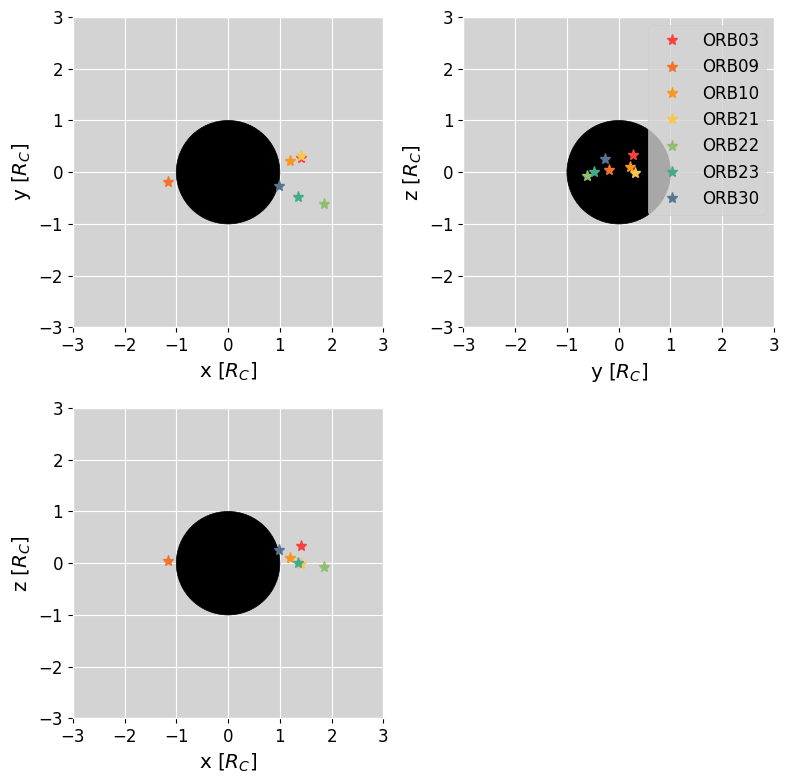

In [47]:
# Initialising figures and adding Callisto
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Add the Callisto circle to each subplot using the function
for i in range(2):
    for j in range(2):
        axes[i, j] = add_callisto_circle(axes[i, j])

# Defining and applying the common limits
common_xlim = (-3, 3)  
common_ylim = (-3, 3)
common_zlim = (-3, 3)

axes[0, 0].set_xlim(common_xlim)
axes[0, 0].set_ylim(common_ylim)

axes[1, 0].set_xlim(common_xlim)
axes[1, 0].set_ylim(common_zlim)

axes[0, 1].set_xlim(common_ylim)
axes[0, 1].set_ylim(common_zlim)

# Set the labels
axes[0, 0].set_xlabel('x [$R_C$]')
axes[0, 0].set_ylabel('y [$R_C$]')

axes[1, 0].set_xlabel('x [$R_C$]')
axes[1, 0].set_ylabel('z [$R_C$]')

axes[0, 1].set_xlabel('y [$R_C$]')
axes[0, 1].set_ylabel('z [$R_C$]')


for i in range(0, len(CA_coords_all)):
    CA_coords_i = CA_coords_all[i]
    x, y, z = spherical_to_cartesian(CA_coords_i[0], CA_coords_i[1], CA_coords_i[2])
    axes[0, 0].plot(x, y, '*', label=orbit_label[i])
    axes[1, 0].plot(x, z, '*', label=orbit_label[i])
    axes[0, 1].plot(y, z, '*', label=orbit_label[i])

axes[0, 1].legend(loc='upper right')

# Remove the bottom-right subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()
    

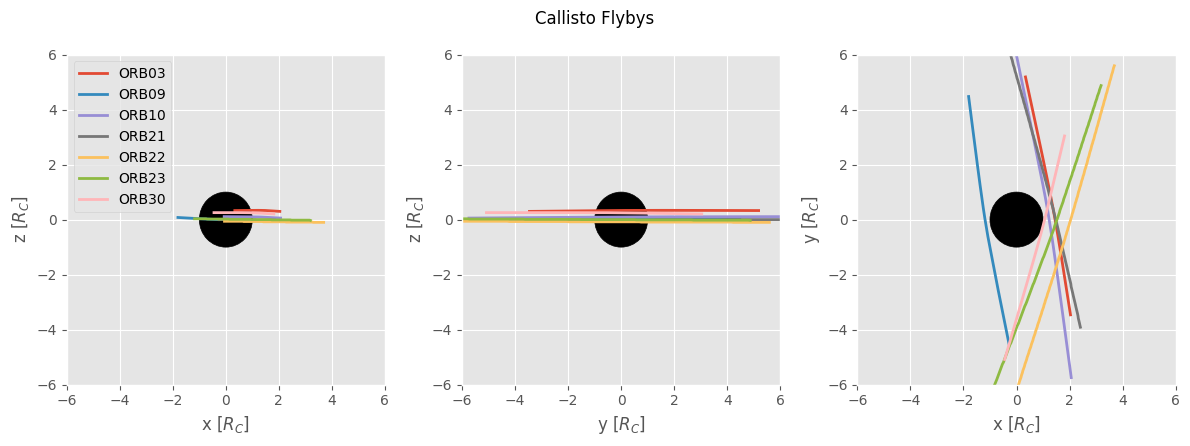

In [48]:
# Horizontally

# Define the common x and y limits for all subplots
common_xlim = (-6, 6)
common_ylim = (-6, 6)

plt.style.use('ggplot')
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5))

# Add the Callisto circle to each subplot using the function
for i in range(3):
    axes[i] = add_callisto_circle(axes[i])

# Apply the common limits to all subplots
for i in range(3):
    axes[i].set_xlim(common_xlim)
    axes[i].set_ylim(common_ylim)

# First subplot: x against z
axes[0].plot(x_03, z_03, label=label_03)
axes[0].plot(x_09, z_09, label=label_09)
axes[0].plot(x_10, z_10, label=label_10)
axes[0].plot(x_21, z_21, label=label_21)
axes[0].plot(x_22, z_22, label=label_22)
axes[0].plot(x_23, z_23, label=label_23)
axes[0].plot(x_30, z_30, label=label_30)
axes[0].set_xlabel('x [$R_C$]')
axes[0].set_ylabel('z [$R_C$]')

# Second subplot: y against z
axes[1].plot(y_03, z_03, label=label_03)
axes[1].plot(y_09, z_09, label=label_09)
axes[1].plot(y_10, z_10, label=label_10)
axes[1].plot(y_21, z_21, label=label_21)
axes[1].plot(y_22, z_22, label=label_22)
axes[1].plot(y_23, z_23, label=label_23)
axes[1].plot(y_30, z_30, label=label_30)
axes[1].set_xlabel('y [$R_C$]')
axes[1].set_ylabel('z [$R_C$]')

# Third subplot: x against y
axes[2].plot(x_03, y_03, label=label_03)
axes[2].plot(x_09, y_09, label=label_09)
axes[2].plot(x_10, y_10, label=label_10)
axes[2].plot(x_21, y_21, label=label_21)
axes[2].plot(x_22, y_22, label=label_22)
axes[2].plot(x_23, y_23, label=label_23)
axes[2].plot(x_30, y_30, label=label_30)
axes[2].set_xlabel('x [$R_C$]')
axes[2].set_ylabel('y [$R_C$]')

axes[0].legend(loc='upper left')

plt.suptitle("Callisto Flybys")
plt.tight_layout()
plt.show()


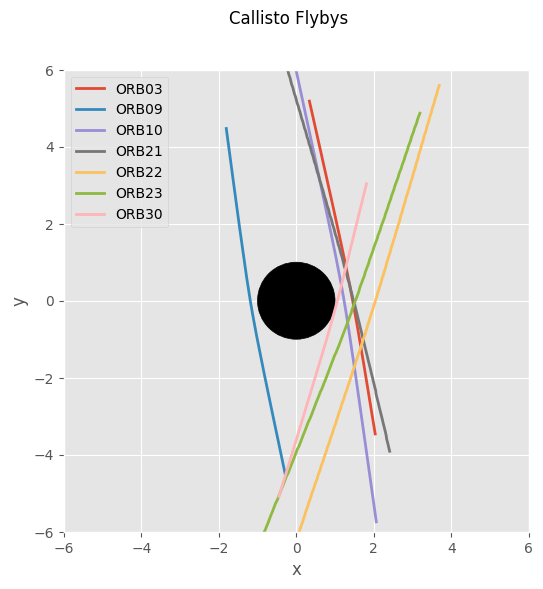

In [49]:
# Plot all trajectories

# Create a new figure and axis for the top-right subplot
fig, ax = plt.subplots(figsize=(6, 6))
ax = add_callisto_circle(ax)

# Apply the common limits to the top-right subplot
ax.set_xlim(common_xlim)
ax.set_ylim(common_ylim)

# Plot the data for the top-right subplot
ax.plot(x_03, y_03, label=label_03)
ax.plot(x_09, y_09, label=label_09)
ax.plot(x_10, y_10, label=label_10)
ax.plot(x_21, y_21, label=label_21)
ax.plot(x_22, y_22, label=label_22)
ax.plot(x_23, y_23, label=label_23)
ax.plot(x_30, y_30, label=label_30)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

fig.suptitle("Callisto Flybys")

plt.show()


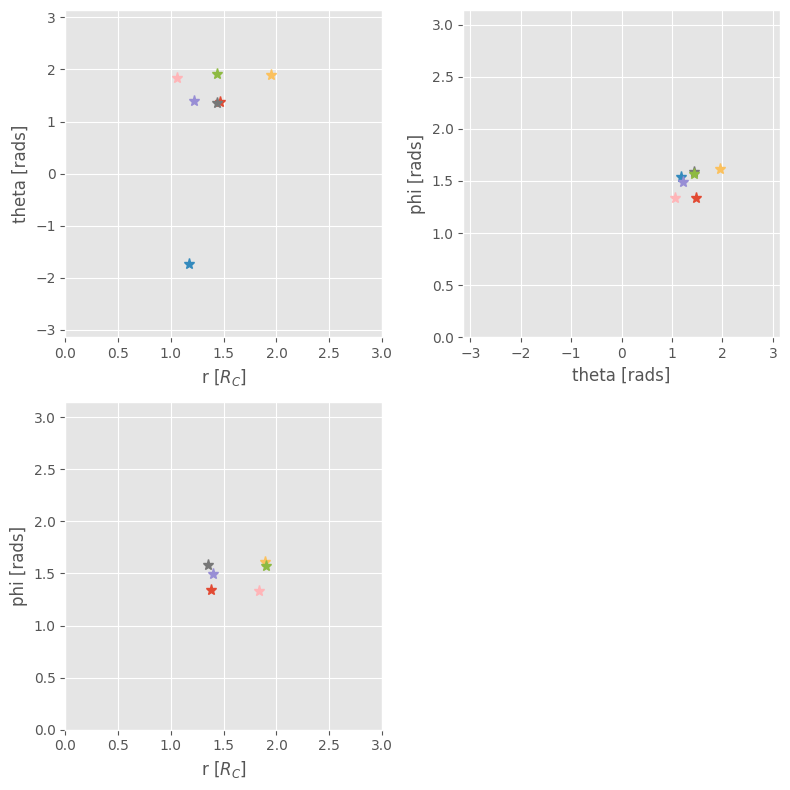

In [50]:


fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Defining and applying common limits
common_r_lim = (0, 3)  
common_theta_lim = (-np.pi, np.pi)
common_phi_lim = (0, np.pi)

axes[0, 0].set_xlim(common_r_lim)
axes[0, 0].set_ylim(common_theta_lim)

axes[1, 0].set_xlim(common_r_lim)
axes[1, 0].set_ylim(common_phi_lim)

axes[0, 1].set_xlim(common_theta_lim)
axes[0, 1].set_ylim(common_phi_lim)

# Set the labels
axes[0, 0].set_xlabel('r [$R_C$]')
axes[0, 0].set_ylabel('theta [rads]')

axes[1, 0].set_xlabel('r [$R_C$]')
axes[1, 0].set_ylabel('phi [rads]')

axes[0, 1].set_xlabel('theta [rads]')
axes[0, 1].set_ylabel('phi [rads]')

# Plotting the closest approach coordinates in spherical coordinates
for CA_coords_i in CA_coords_all:
    axes[0, 0].plot(CA_coords_i[0], CA_coords_i[1], '*')
    axes[0, 1].plot(CA_coords_i[0], CA_coords_i[2], '*')
    axes[1, 0].plot(CA_coords_i[1], CA_coords_i[2], '*')

# Remove the bottom-right subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


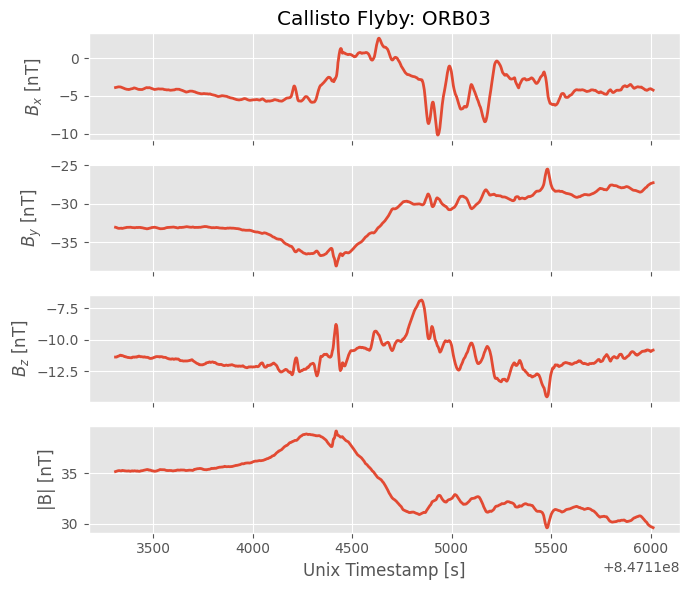

<Figure size 640x480 with 0 Axes>

In [51]:
# Plot magnetic field components for given flyby

plt.style.use('ggplot')
plot_magnetic_field(unix_timestamp_03, Bx_03, By_03, Bz_03, B_mag_03, flyby='ORB03')
plt.tight_layout()